### How to Use Backgroun Subtraction Methods

Background subtraction is common and widely used technique for generating the foreground mask which is also known as the binary image containing the pixels belonging to the moving object of a scene when these images are captured using a static camera.
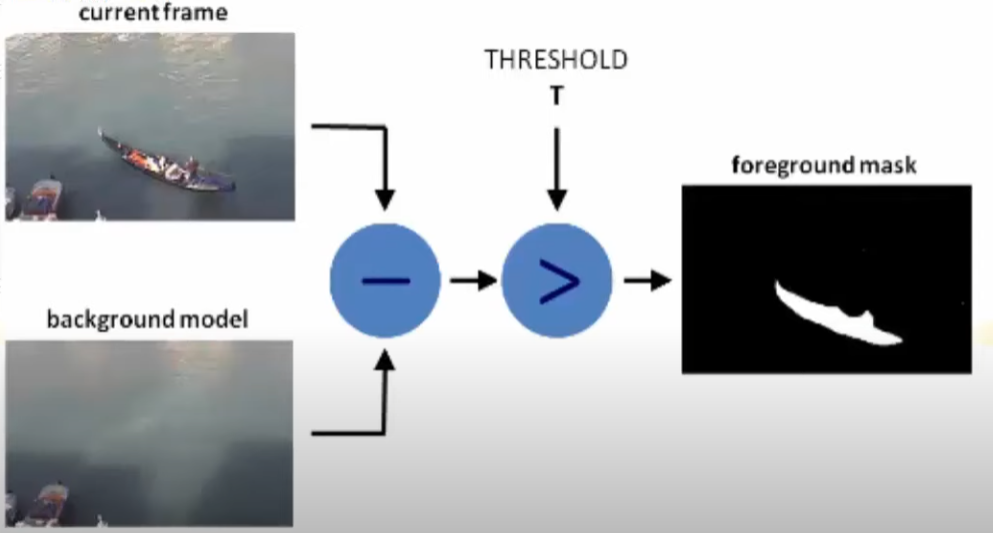

(creates a mask for the thing that's changed from 1 scene to another)

e.g. static traffic camera that wants to count the number of cars who've driven through an area or to detect the number of people in a camera view

Options for the background subtractor are: \
cv2.bgsegm.createBackgroundSubtractorMOG() \
 \
cv2.createBackgroundSubtractorMOG2() \
 \
cv2.bgsegm.createBackgroundSubtractorGMG() \
 \
cv2.createBackgroundSubtractorKNN() \
 \
cv2.bgsegm.createBackgroundSubtractorCNT() \
 \
cv2.bgsegm.createBackgroundSubtractorGSOC() \
 \
cv2.bgsegm.createBackgroundSubtractorLSBP() 


In [40]:
import numpy as np
import cv2

In [41]:
#rean in the capture vidoe
cap = cv2.VideoCapture('./data/vtest.avi')

In [44]:
#here we'll create a bunch of variables that are different background subtractor methods

#createBackgroundSubtractorMOG([, history[, nmixtures[, backgroundRatio[, noiseSigma]]]])
#gaussian mixture based background and foreground segmentation algorithm 
MOG = cv2.bgsegm.createBackgroundSubtractorMOG() #all the params for this are set by default

#createBackgroundSubtractorMOG2([, history[, varThreshold[, detectShadows]]])
#gaussian mixture based background and foreground segmentation algorithm 
#MOG2 has a parameter to detect shadows, unlike MOG()
MOG2 = cv2.createBackgroundSubtractorMOG2(detectShadows = True)

#createBackgroundSubtractorGMG([, initializationFrames[, decisionThreshold]])
#combines statistical background image estimation and pre-pixel biasing segmentation 
GMG = cv2.bgsegm.createBackgroundSubtractorGMG()
#kernel that will be used in GMG
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

#createBackgroundSubtractorKNN([, history[, dist2Threshold[, detectShadows]]])
KNN = cv2.createBackgroundSubtractorKNN(detectShadows = True)

In [45]:

while True:
    ret, frame = cap.read()
    if frame is None:
        break
    
    #create the foreground mask to the frame
    fgmask = MOG.apply(frame)
    
    fgmask2 = MOG2.apply(frame)
    
    fgmask3 = GMG.apply(frame)
    #apply morphological opening to the GMG background image
    fgmask3 = cv2.morphologyEx(fgmask3, cv2.MORPH_OPEN, kernel)
    
    fgmask4 = KNN.apply(frame)
    
    
    cv2.imshow('frame', frame)
    cv2.imshow('MOG', fgmask)
    cv2.imshow('MOG2', fgmask2)
    cv2.imshow('GMG', fgmask3)
    cv2.imshow('KNN', fgmask4)
    
    keyboard = cv2.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

cap.release()
cv2.destroyAllWindows()

fgbg    cv2.bgsegm.createBackgroundSubtractorMOG() reutrns an image like this for every frame
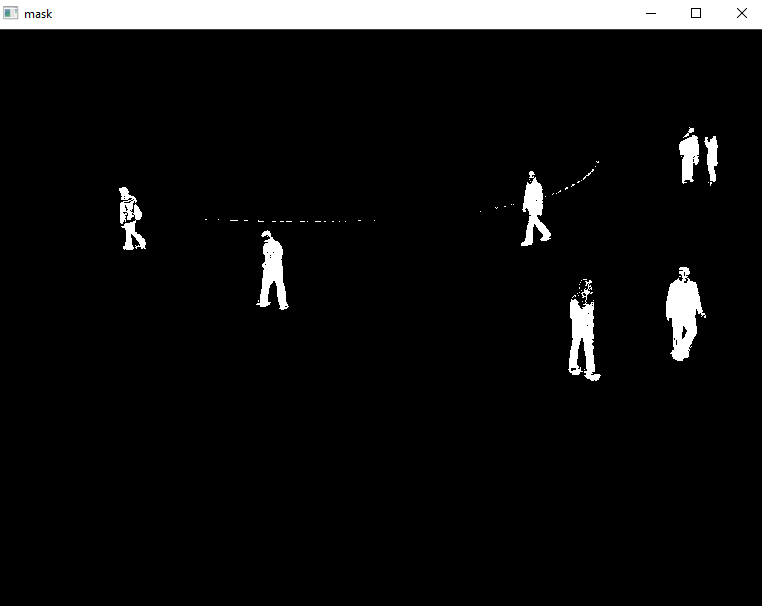
It works pretty well and there is only a little bit of background noise

MOG2 has the option of detecting shadows as well
MOG2 has much more noise with the default params
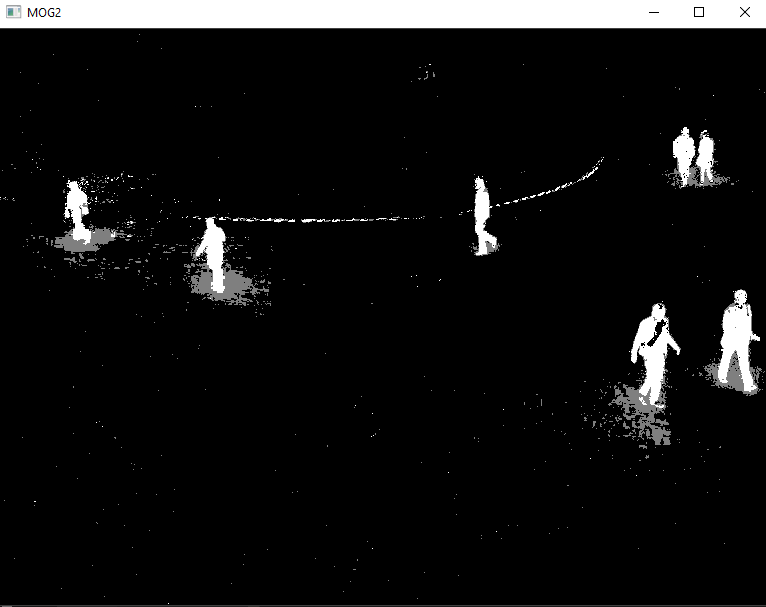

GMG has really bad results so we need to apply morphological opening to the result
without morphological opening
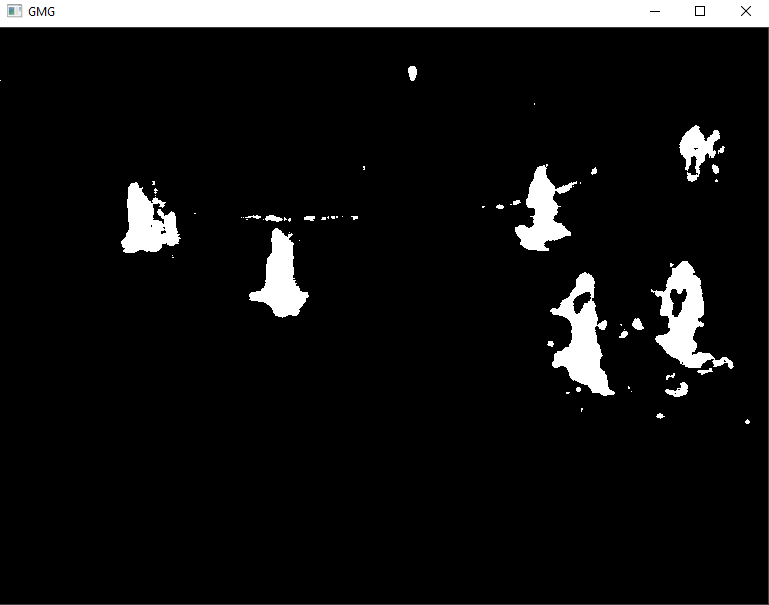
with morphological opening
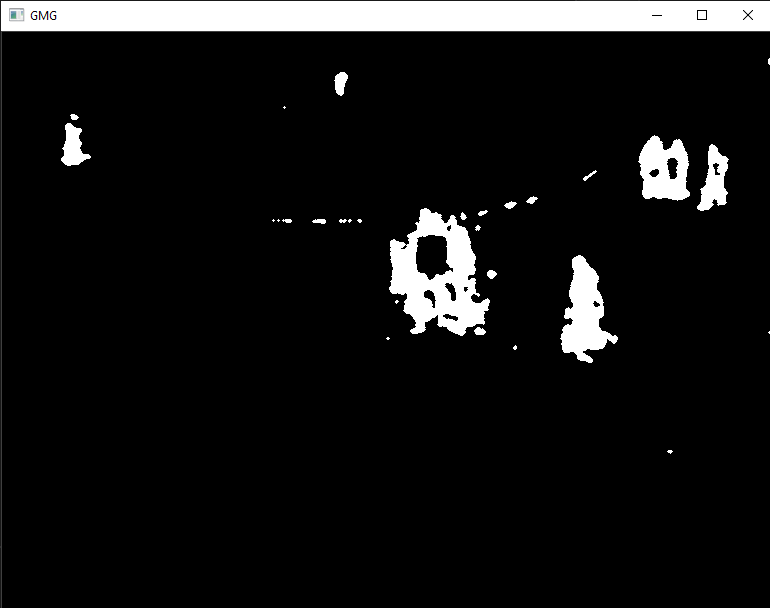

KNN gives pretty good results too.
Also shows shadows as gray pixels
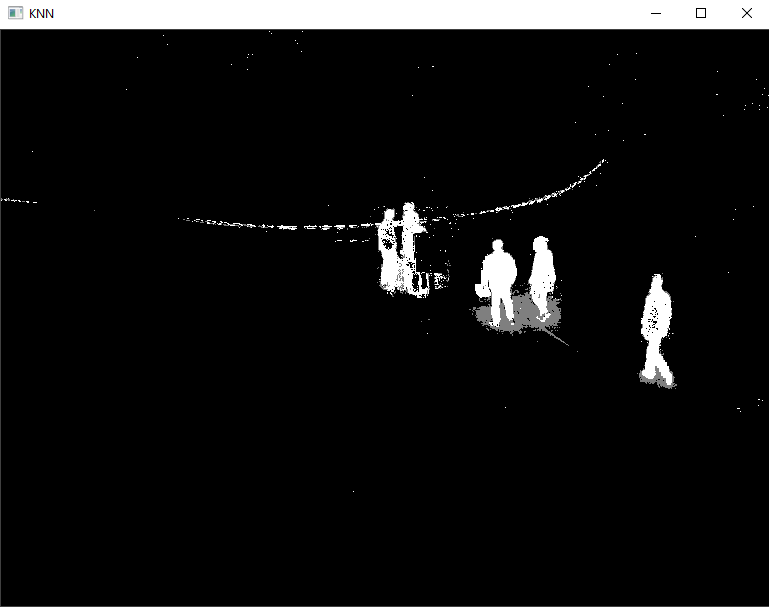